In [1]:
import numpy as np
from math import sqrt
import pickle
import matplotlib.pyplot as plt

In [2]:
def powerspec(data):
  print ("shape of data = ",data.shape)
  eps = 1e-50 # to void log(0)
  c  = sqrt(1.4);
  Ma = 0.1;
  U0 = Ma*c; 
  U = data/U0
  amplsU = abs(np.fft.fftn(U)/U.size)

  EK_U  = amplsU**2

  EK_U = np.fft.fftshift(EK_U)

  sign_sizex = np.shape(EK_U)[0]
  sign_sizey = np.shape(EK_U)[1]

  box_sidex = sign_sizex
  box_sidey = sign_sizey

  box_radius = int(np.ceil((np.sqrt((box_sidex)**2+(box_sidey)**2))/2.)+1)

  centerx = int(box_sidex/2)
  centery = int(box_sidey/2)

  print ("box sidex     =",box_sidex) 
  print ("box sidey     =",box_sidey) 
  print ("sphere radius =",box_radius )
  print ("centerbox     =",centerx)
  print ("centerboy     =",centery)

  EK_U_avsphr = np.zeros(box_radius,)+eps ## size of the radius

  for i in range(box_sidex):
    for j in range(box_sidey):
      wn =  int(np.round(np.sqrt((i-centerx)**2+(j-centery)**2)))
      EK_U_avsphr[wn] = EK_U_avsphr [wn] + EK_U [i,j]

  return EK_U_avsphr


In [3]:
def plot_spec(*args):
    fig = plt.figure()
    plt.title("Kinetic Energy Spectrum")
    plt.xlabel(r"k (wavenumber)")
    plt.ylabel(r"TKE of the k$^{th}$ wavenumber")

    for K in args:
        realsize=len(np.fft.rfft(K))
        plt.plot(K)
        plt.loglog(np.arange(0,realsize),((K[0:realsize] )),'k')
        plt.loglog(np.arange(realsize,len(K),1),((K[realsize:] )),'k--')    
    
    
    axes = plt.gca()
    axes.set_ylim([10**-25,10])


In [4]:
# load turbulence data
X_turbulence=pickle.load(open("/Users/corpetti/donnees_travail/dns2D/scal_31.npy", "rb" ))
# load turbulence data, x2 resized with linear interpolation
X_turbulence_x2=pickle.load(open("/Users/corpetti/donnees_travail/dns2D/scal_31_x2_bilinear.npy", "rb" ))
# load turbulence data, x4 resized with linear interpolation
X_turbulence_x4=pickle.load(open("/Users/corpetti/donnees_travail/dns2D/scal_31_x4_bilinear.npy", "rb" ))
# create a random image
X_random = np.random.rand(512,512)


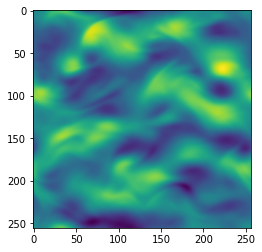

In [5]:
plt.imshow(X_turbulence)

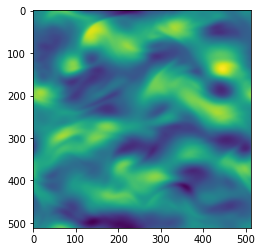

In [6]:
plt.imshow(X_turbulence_x2)

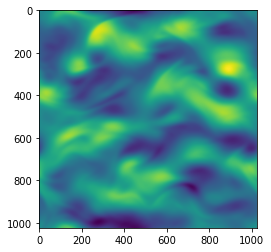

In [7]:
plt.imshow(X_turbulence_x4)

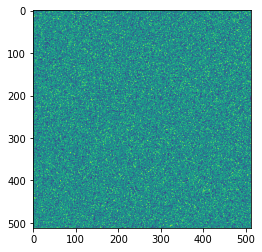

In [8]:
plt.imshow(X_random)

In [9]:
Kspec_turbulence=powerspec(X_turbulence)

shape of data =  (256, 256)
box sidex     = 256
box sidey     = 256
sphere radius = 183
centerbox     = 128
centerboy     = 128


In [10]:
Kspec_turbulence_x2=powerspec(X_turbulence_x2)

shape of data =  (512, 512)
box sidex     = 512
box sidey     = 512
sphere radius = 364
centerbox     = 256
centerboy     = 256


In [11]:
Kspec_turbulence_x4=powerspec(X_turbulence_x4)

shape of data =  (1024, 1024)
box sidex     = 1024
box sidey     = 1024
sphere radius = 726
centerbox     = 512
centerboy     = 512


In [12]:
Kspec_random=powerspec(X_random)

shape of data =  (512, 512)
box sidex     = 512
box sidey     = 512
sphere radius = 364
centerbox     = 256
centerboy     = 256


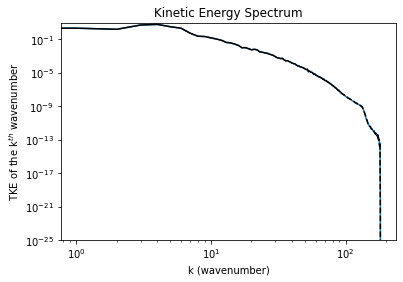

In [13]:
plot_spec(Kspec_turbulence)

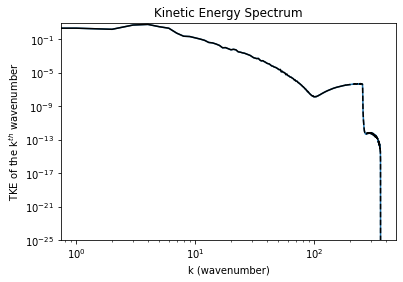

In [14]:
plot_spec(Kspec_turbulence_x2)

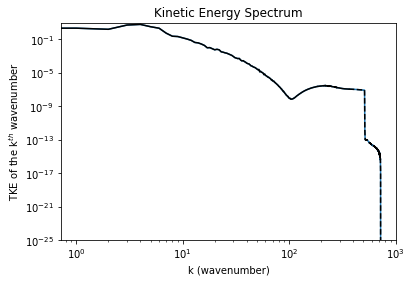

In [15]:
plot_spec(Kspec_turbulence_x4)

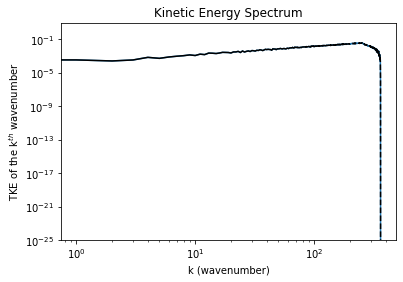

In [16]:
plot_spec(Kspec_random)

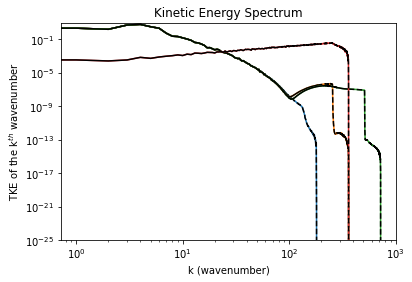

In [17]:
plot_spec(Kspec_turbulence,Kspec_turbulence_x2,Kspec_turbulence_x4,Kspec_random)